## Hvilken type vin var mest populær det givne år?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import re
import time

In [2]:
df = pd.read_csv('vinData.csv', names=["Name", "Year", "Price", "Rating", "Reviews", "Country"])
year_review_mask = (df['Year'] < 2022) & (df['Reviews'] > 0)
dfClean = df[year_review_mask]

In [3]:
dfClean.head()

,Name,Year,Price,Rating,Reviews,Country
1,Malbec 2016,2016,69.95,3.6,16818,Argentina
2,Malbec 2018,2018,59.95,3.8,16779,Argentina
3,Malbec 2016,2016,129.95,4.1,16138,Argentina
4,Cabernet Sauvignon 2016,2016,1245.00,4.6,13945,United States
5,Malbec 2013,2013,99.95,3.9,13271,Argentina


In [4]:
data_chart = dfClean.drop(columns=('Price'))
data_chart.head()


,Name,Year,Rating,Reviews,Country
1,Malbec 2016,2016,3.6,16818,Argentina
2,Malbec 2018,2018,3.8,16779,Argentina
3,Malbec 2016,2016,4.1,16138,Argentina
4,Cabernet Sauvignon 2016,2016,4.6,13945,United States
5,Malbec 2013,2013,3.9,13271,Argentina


In [5]:
#Test index på vin

column = dfClean["Rating"]
max_index = column.idxmax()
max_index
data_chart.loc[116]

Name       Viña Bosconia Reserva 2007
Year                             2007
Rating                            4.2
Reviews                          2517
Country                         Spain
Name: 116, dtype: object

In [6]:
# mask_by_year = data_chart.groupby('Year')
# max_rating = mask_by_year
# df_stats = pd.DataFrame()
# df_stats['Rating'] = max_rating['Rating'].max()
# df4 = data_chart.loc[data_chart.groupby('Year')['Rating'].idxmax()]
# df_stats['Name'] = max_rating['Name']
# df_stats['Country'] = max_rating['Country']
# df_stats['Year'] = max_rating['Year']
# df_stats
# #df4

In [7]:
def max_rating_df(df):
    m = data_chart.groupby('Year')['Rating'].transform('max') == data_chart['Rating']
    dfmax = data_chart.loc[m]
    max_rating = dfmax.sort_values('Year')
    maxdf = max_rating.drop_duplicates()
    return maxdf

    
max_df = data_chart.copy()
maxdfdf = max_rating_df(max_df)
maxdfdf


,Name,Year,Rating,Reviews,Country
383,Cos d'Estournel 1986,1986,4.4,1136,France
516,Saint-Julien (Grand Cru Classé) 1995,1995,4.3,916,France
698,Saint-Julien (Grand Cru Classé) 2003,2003,4.2,718,France
454,Saint-Julien (Grand Cru Classé) 2004,2004,4.2,1004,France
61,Rouge (Gaston Hochar) 2004,2004,4.2,3424,Lebanon
197,Viña Bosconia Reserva 2005,2005,4.1,1828,Spain
528,Dominus (Christian Moueix) 2006,2006,4.4,901,United States
116,Viña Bosconia Reserva 2007,2007,4.2,2517,Spain
107,Viña Tondonia Reserva 2008,2008,4.3,2630,Spain
140,Pauillac (Grand Cru Classé) 2008,2008,4.3,2298,France


(<matplotlib.axes._subplots.AxesSubplot at 0x7ff5244d3850>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff527a28a50>)

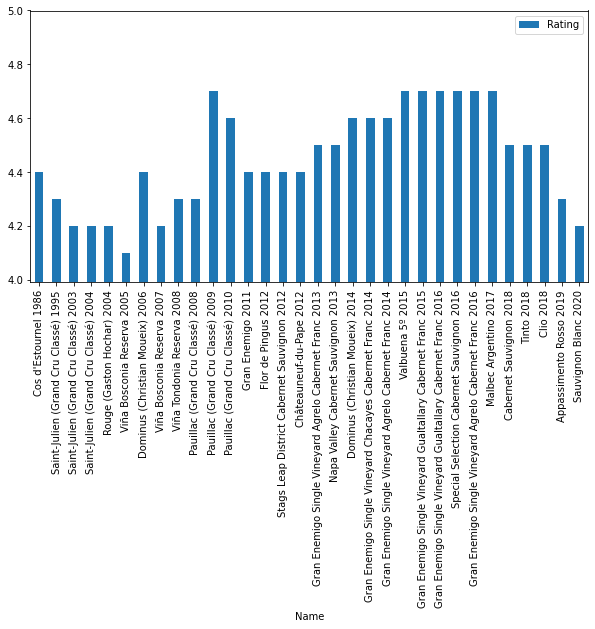

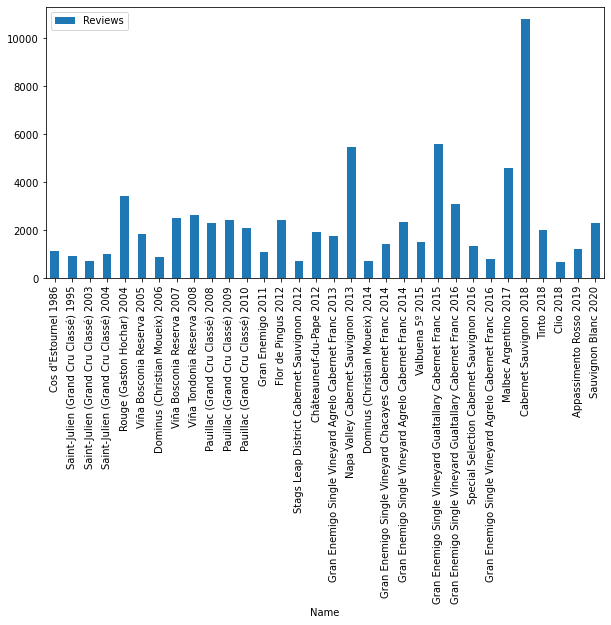

In [15]:
def plot_max_df(maxdf):
    ax = maxdf.plot.bar(rot=90,x='Name', y='Rating', figsize=(10,5))
    ax.set_ylim([3.99,5])
    ax1 = maxdf.plot.bar(rot=90,x='Name', y='Reviews', figsize=(10,5))
    return ax, ax1

plot_max_df(maxdfdf)     

In [14]:
def max_occurences(df):
    #Hvilket land har haft den bedste vin flest gange.
    no_of_occur_max = df['Country'].value_counts()
    return no_of_occur_max
max_occurences(maxdfdf)

France           8
Argentina        8
Spain            7
United States    6
Lebanon          1
Italy            1
New Zealand      1
Name: Country, dtype: int64